In [ ]:
# 코드는 몰라도 개념이해는 확실하게 하기

In [ ]:
# 머신 러닝
# input 과 Label을 활용하여 규칙을 찾게하는 과정
# 지도학습 : Label 이 있다 
 # - K-NN(최근접 이웃), Decision Tree(결정트리), Support Vector Machine(SVM)
# 비지도학습 : Label 이 있다
# 강화학습 : 보상(reward)을 통해 학습

In [ ]:
# 비지도 학습(Unsupervised Learning)
# - Label이 없다
# 군집, 차원 축소, 이상 탐지

# 군집 알고리즘(Clustering)
# K-Means Clustering 
# 핵심 개념 : 사용자가 지정한 K개의 군집을 설정하기 위해
# 중심점을 설정하고, 각 데이터 포인터를 가장 가까운 중심점에 할당

# 순서
# 1) K개의 중심점을 설정한다
# 2) 할당 : 모든 데이터를 가장 가까운 중심점에 할당한다
# 3) 이동 : 각 군집의 중심점을 해당 군집에 속한 데이터들을 평균 위치로 이동


In [1]:
# 1) 임의의 데이터
from sklearn.datasets import make_blobs # 군집용 데이터  생성
from sklearn.cluster import KMeans # 군집 알고리즘

# 속성(200개 데이터, 2개의 특징, 최종 군집 개수 4개, 군집 표준편차)
X, y = make_blobs(n_samples=200, n_features=2, centers= 4, cluster_std=1.0,random_state=42)

# 엘보우 기법을 통해 k 를 찾아나감, 지금은 일단 4
k = 4 
kmeans = KMeans(n_clusters= 4, random_state=42, n_init="auto") #n_clusters = n ,n은 군집수
kmeans.fit(X)





KMeans(n_clusters=4, random_state=42)

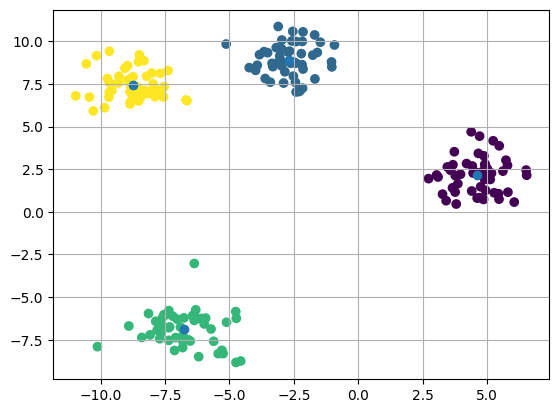

In [2]:
# 각 군집의 중심점 좌표, 군집 Label
centors = kmeans.cluster_centers_ # 중심점 좌표
labels = kmeans.labels_ # X 의 군집된 결과

# 이 결과를 토대로 시각화
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=labels)  # 군집된 데이터 시각화 (labels 에 따라 다른색 )
plt.scatter(centors[:,0],centors[:,1])
plt.grid(True)
plt.show()

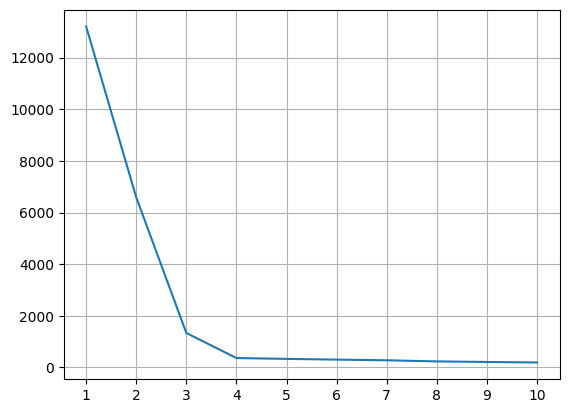

In [3]:
# 엘보우 방법을 이용한 최적의 k 찾기
k_range = range(1,11)

inertia_list = []

for k in k_range:
    kmeans_test = KMeans(n_clusters= k, random_state= 42, n_init="auto")
    kmeans_test.fit(X)
    kmeans_test.inertia_ # 군집 내 데이터들과 중섬짐 사이의 거리
    inertia_list.append(kmeans_test.inertia_)

plt.plot(k_range,inertia_list)
plt.grid(True)
plt.xticks(k_range)
plt.show()

# 최초로 꺾이는 지점을 k로 설정하면 됨. (4 or 3)

In [4]:
# 실제 data 군집
# 쇼핑몰 고객 데이터
import pandas as pd
df = pd.read_csv("https://github.com/nayeho/robot/raw/refs/heads/main/Mall_Customers.csv")
df.head()
# CustomerID 는 Primary Key
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


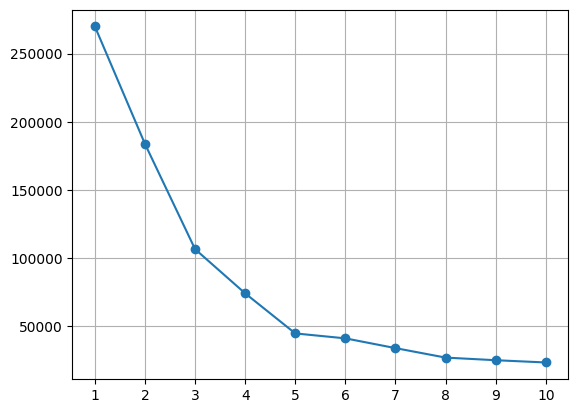

In [5]:
X= df[["Annual Income (k$)","Spending Score (1-100)"]]
# 우리가 사용할 머신러닝 input은 대개 ndarray
X = X.values

# 목표 : X 를 k 개로 군집화 시키고 싶다.

# 엘보우 방법 사용
k_range = range(1,11)
inertia_list = []
for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_test.fit(X)
    inertia_list.append(kmeans_test.inertia_)
    
plt.plot(k_range, inertia_list, marker="o")
plt.grid(True)
plt.xticks(k_range)
plt.show()

# 급격히 꺾여서 완만해지는 지점 >> k = 5 정도

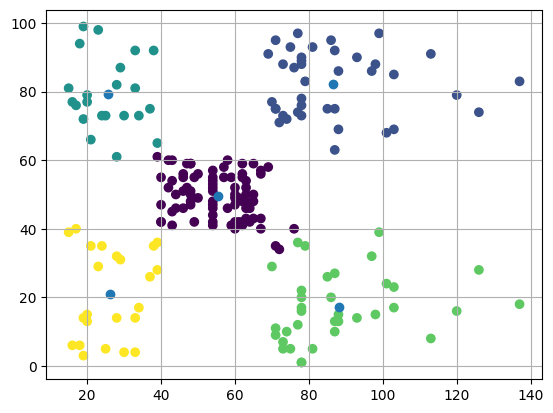

In [6]:
# 급격히 꺾여서 완만해지는 지점 >> k = 5 정도
kmeans = KMeans(n_clusters=5,random_state=42,n_init="auto")
kmeans.fit(X)
centors = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centors[:,0],centors[:,1])
plt.grid(True)
plt.show()


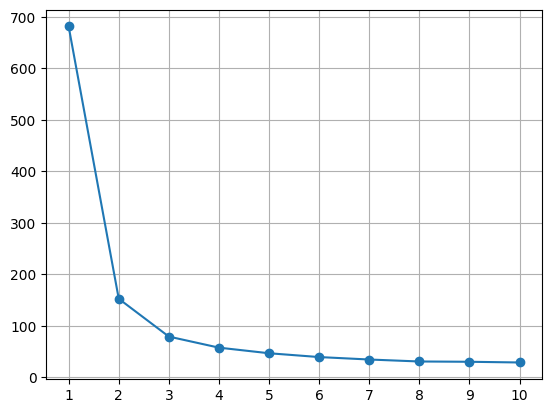

In [8]:

# 지도학습-분류
# 붓꽃 데이터
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset

# 비지도학습 - 군집 : 정답 필요 x 
X = iris_dataset.data

k_range =range(1,11)
inertia_list = []
for k in k_range:
    kmeans_test = KMeans(n_clusters= k, random_state= 42, n_init="auto")
    kmeans_test.fit(X)
    inertia_list.append(kmeans_test.inertia_)
    
plt.plot(k_range, inertia_list, marker = "o")
plt.grid(True)
plt.xticks(k_range)
plt.show() 
# k= 3 or 4 정도


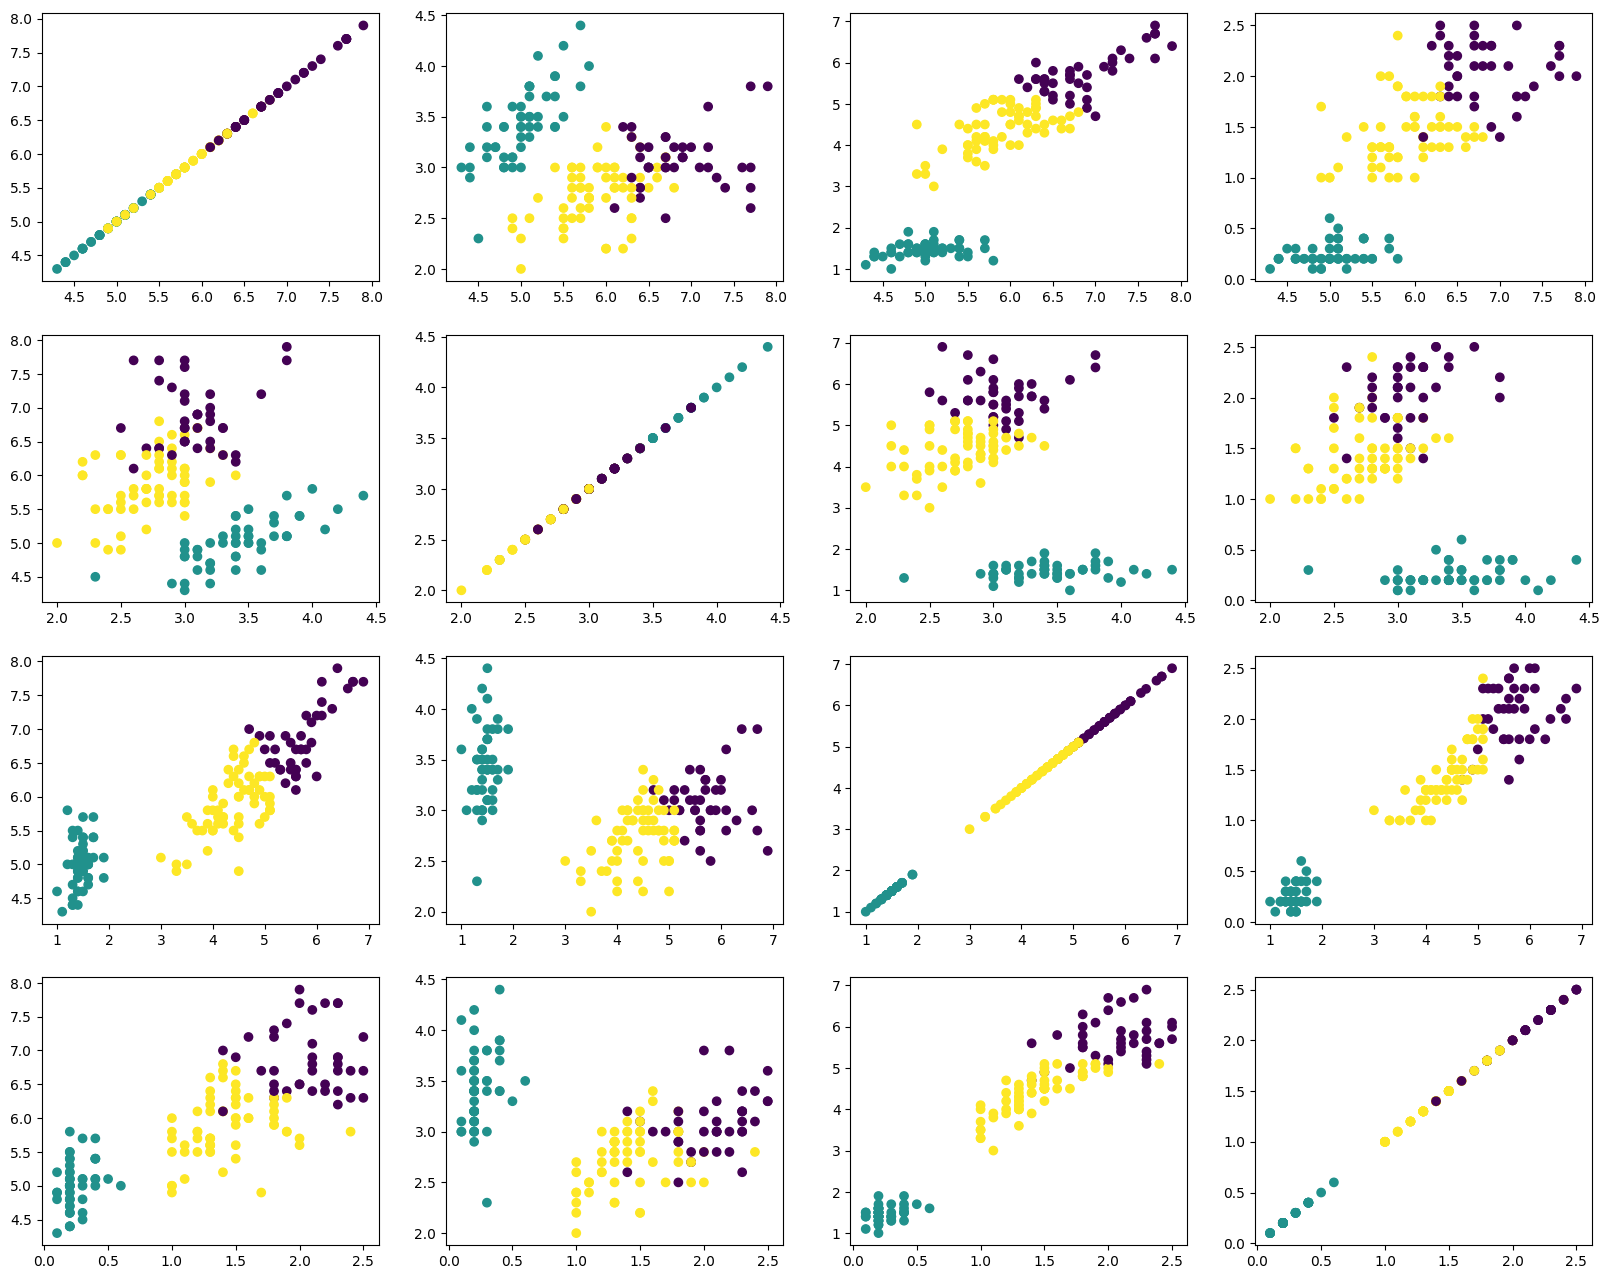

In [9]:
# 엘보우 방법을 통해 k 가 3임을 확인

kmeans = KMeans(n_clusters=3,random_state=42,n_init="auto")
kmeans.fit(X)

centors = kmeans.cluster_centers_
labels = kmeans.labels_

fig, axis = plt.subplots(4,4,figsize=(20,16))
for i in range(4):
    for j in range(4):
        axis[i,j].scatter(X[:,i],X[:,j],c = labels)

# plt.scatter(X[:,0],X[:,1], c=labels) 
# plt.scatter(X[:,2],X[:,3], c=labels)
plt.show()


In [ ]:
# 다른 형태의 군집되어있는 데이터를 학습
# 밀도 기반 알고리즘 (DBSCAN : Density-Based-Spatial Clustering of Application with Noise)
# 밀집되어 있는 영역 기반 군집 알고리즘
# 핵심 개념 
# eps(epsilon) : 개별 데이터를 중심으로 하는 원의 반경
# min_samples : 하나의 군집으로 인정받기 위한 최소 샘플 수

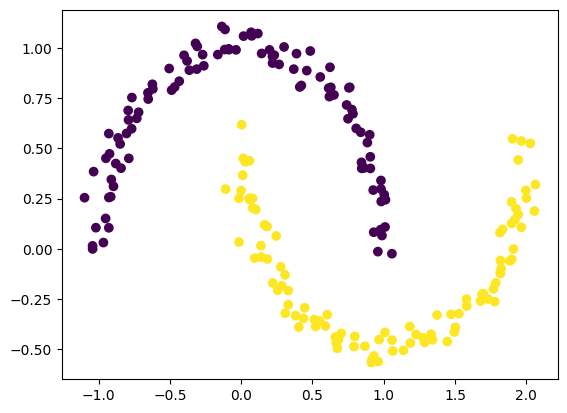

In [10]:
from sklearn.datasets import make_moons # 초승달모양 데이터 생성
from sklearn.cluster import DBSCAN


X,y = make_moons(n_samples=200, noise=0.05,random_state=42)
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=clusters)
plt.show()

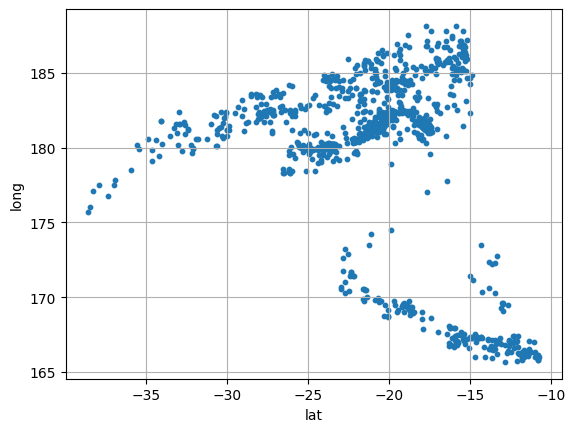

In [12]:
# 실제 피지 지진 데이터를 DBSCAN 활용하여 군집
import pandas as pd
df = pd.read_csv("https://github.com/nayeho/robot/raw/refs/heads/main/quakes.csv")

X = df[["lat","long"]]
X = X.values # ndarray 로 바꾸는 과정

# 군집 하기 전에 시각화 먼저
plt.scatter(X[:,0],X[:,1],s=10) # s : 마커 사이즈 10으로 조정
plt.grid(True)
plt.xlabel("lat")
plt.ylabel("long")
plt.show()

# DBSCAN 사용시 장점: 군집 개수 정하지 않아도 됨
# 단점: eps를 계산해야함

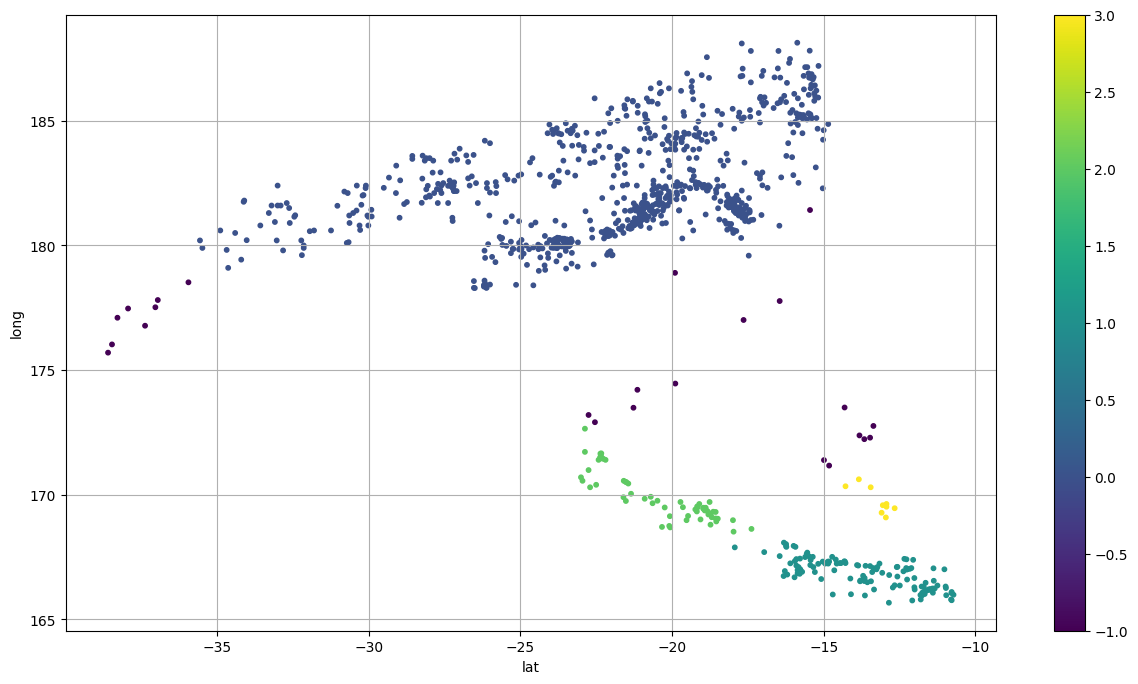

In [13]:
# eps 1.0 으로 두고 출발
# min_sample = 5
dbscan = DBSCAN(eps=1.0,min_samples=5)
clusters = dbscan.fit_predict(X)
plt.figure(figsize=(15,8))
plt.scatter(X[:,0],X[:,1],c=clusters,s=10)
plt.xlabel("lat")
plt.ylabel("long")
plt.colorbar()
plt.grid(True)
plt.show()


In [14]:
# -1은 noise임  -1을 제외한 0,1,2,3 > 총 4개
set(clusters) 
# -1 은 보라색 추정

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3)}

In [ ]:
from sklearn.neighbors import NearestNeighbors
# eps 찾기
# K-distance 알고리즘 활용하여 찾기
# eps, min_samples 은 feature 개수 x 2 정도로 설정
# 4~5 정도 
# 만약, min_samples을 5(n)로 설정했다면   (최소 5개까지가 하나의 군집으로 인정)
# 각 점(데이터 포인트)에서 4(n-1)개의 점까지 거리 계산
k = 4
nn = NearestNeighbors(n_neighbors=k)
neighbors = nn.fit(X)
distance, indices = neighbors.kneighbors(X)

# 이 거리를 갖고 그래프를 그리기
# 그리기 전에 정렬
import numpy as np
dis_sorted = np.sort(distance[:,k - 1], axis=0)
plt.plot(dis_sorted)
plt.grid(True)
plt.show()

# 급격하게 꺾이는지점을 찾아서 y값을 읽으면 eps값이 됨. X= 800-1000사이 , y=0.5-1.0

# 차원 축소 
from sklearn.datasets import load_digits
digits = load_digits()

fig, axis = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={"xticks":[], "yticks":[]},
                        gridspec_kw=dict(hspace=0.4, wspace=0.1))
count=0
for i in range(2):
    for j in range(5):
        axis[i,j].imshow(digits["images"][count],cmap="binary",interpolation="nearest")
        count += 1
        
plt.show()

# image = digits["images"][0] # 1번째 shape 를 통해 몇개 데이터 8X8 64개 데이터가짐

# # 시각화
# # 도대체 어떤 이미지인가?
# plt.figure(figsize=(5,5))
# plt.imshow(image, cmap="binary",interpolation="nearest")
# plt.show()

# 각 데이터 64개의 feature를 가지고 있다
# 64개 중에서 어떤 feature가 중요한가?
# feature를 줄이는 작업 : 차원 축소
# 조건 : 줄여진 feature들이 원래의 data를 잘 표현해야 함
# 차원축소 >> 이미지 파트에서 주로 쓰임

from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data

# 차원 축소 후 원래의 데이터를 얼마나 잘 표현했는지를 확인하기 위하여 label 필요
y = digits.target
print("원본 데이터의 차원 :",X.shape) # 1797,64

# 차원 축소 진행
# 핵심 개념 (P203~)
# 첫 번째 개념: 주 성분 분석(PCA: Principal Component Analysis)
# -원리 : 데이터의 분산이 가장 큰 방향을 새로운 축(주성분)으로 설정하여 원본 데이터를 투영하는 방식.
#        가장 분산이 큰 쪽(특성을 가장 잘 나타내는 쪽)으로 투영 

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 64 -> 2
X_pca = pca.fit_transform(X)
print("축소된 데이터의 차원 : ",X_pca.shape)


print("축소된 데이터의 주성분이 원본을 얼마나 표현하는지")
print(round(sum(pca.explained_variance_ratio_),2))

# 0.29가 의미하는 내용
# 64차원을 2차원으로 축소하였는데, 해당 2차원 데이터가 원본으로 29%나 표현하고 있다.




# X_pca # 현재 2차원 (featrue가 2개)

# 군집 사용해서 K-means
# 10개로 시각화 시키기
# n_init :중심점 이동하는 횟수
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10,random_state=42,n_init="auto") #군집 10개
kmeans.fit(X_pca)

centors = kmeans.cluster_centers_
labels = kmeans.labels_


# plt.scatter(X_pca[:,0],X_pca[:,1],c =labels,s=10)
# plt.grid(True) 
# plt.scatter(centors[:,0],centors[:,1]) # 중심점
# plt.show()



# 만약 새로운 데이터가 들어왔다 가정
X_pca[100]
# 이게 어떤 군집인지 예측
new_data = kmeans.predict(X_pca[100].reshape(1,-1))
plt.scatter(X_pca[:,0],X_pca[:,1],c =labels, s=10)
plt.scatter(centors[:,0],centors[:,1]) 
plt.scatter(X_pca[100][0],X_pca[100][1],c="red") 
plt.grid(True)
plt.show()

# 1) 군집
# 2) 차원축소
# 3) 연관 규칙 분석 (Association Rule Mining) : 특정 feature들 간에 규칙을 찾아내는 기법

# 가게에 우유가 안팔림 > 카스테라 빵을 사는 사람은 일반 소비자보다 우유를 살 확률이 3배 높다
# 카스테라 + 우유를 같이 진열

# 1. 전처리된 장바구니 데이터 (총 10개의 거래)
dataset = [
    ['우유', '계란', '빵'],
    ['우유', '기저귀', '맥주', '감자칩'],
    ['계란', '빵', '주스'],
    ['우유', '기저귀', '맥주', '콜라'],
    ['빵', '계란', '우유'],
    ['기저귀', '맥주', '주스'],
    ['빵', '콜라'],
    ['우유', '계란', '빵', '감자칩'],
    ['기저귀', '맥주'],
    ['우유', '빵']
]

# 위 dataset > list > [""] >문자열
# 문자열 -> 범주형 데이터 (수치형데이터 X)
# DataFrame
# 데이터프레임명.info()
# 결과 : int64, object, bool
# At, 타이타닉 "Sex" -> male, female -> 상관관계 분석(x) bec,수치형 데이터가 아니가 때문

# 간단한 전처리

# 범주형 데이터를 어떻게 전처리 할 것인가 ?
# 1) 레이블 인코딩

item_list = []
for data in dataset:
    for d in data:
        item_list.append(d)
item_list = list(set(item_list))
item_list.sort()
item_list
item_dict = {}
for index, item in enumerate(item_list):
    item_dict[item] = index #item_dict["감자칩"] = 0 ... 이런식으로
    
# 인코딩 결과   
encoded_list = []
for data in dataset:
    temp=[]
    for d in data: # d = 갑자칩, 계란, ...
        temp.append(item_dict[d])
    encoded_list.append(temp)


encoded_list

# 레이블 인코딩 -> 함수
from sklearn.preprocessing import LabelEncoder

# 그 전에 dataset을 df로 변환
items = []
for data in dataset:
    for d in data:
        items.append(d)
items = list(set(items)) # 중복을 피하기 위함
df = pd.DataFrame({"item":items})

le = LabelEncoder()
df["encoded_label"] = le.fit_transform(df["item"])

# 원-핫 인코딩(One-Hot Encoding)방식
# 데이터들을 쭉 나열 : 
#          우유 ,계란, 빵, 기저귀, 맥주, 감자칩 
# 1번 고객 Ture, Ture, Ture, False, False, False
# 함수 사용하지 않고 직접 One-Hot Encoding
items = []
for data in dataset:
    for d in data:
        items.append(d)
items = list(set(items))
items.sort()

item_dict = {}
for index, item in enumerate(items):
    item_dict[item] = index 
item_dict


# 원-핫 인코딩
encoded_list = []
for data in dataset:
    # 8개짜리 빈 리스트 만들고 각각에 해당하는 것에 있으면 1(True)로 바꾸는 작업 
    temp = [0] * len(items)
    for d in data:
        #temp = [0,0,0,0,0,0,0,0]
        #d: 기저귀
       temp[item_dict[d]] = 1
    encoded_list.append(temp)
    
df = pd.DataFrame(encoded_list, columns = items) #0 or 1
df.astype(bool) # T or F

# 좀 더 간편하게 One-Hot Encoding
!pip install mlxtend

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
temp = te.fit(dataset).transform(dataset)
df = pd.DataFrame(temp, columns = items)

# 연관 규칙 분석
from mlxtend.frequent_patterns import apriori

# support(지지도) : 전체 데이터 중 해당 값이 포함될 확률
freq = apriori(df,min_support=0.2,use_colnames=True)
freq

# 신뢰도
# 우유를 4명이 샀다 > 그 사람들 중 빵을 3명이 샀으면 신뢰도가 0.75

from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq,min_threshold = 0.6) # 신뢰도가 60% 이상
rules.sort_values(by="lift",ascending=False) # True 오름차순 False 내림차순
# lift :  우연히 2개의 물품을 동시에 샀다면 lift 가 낮다
# 실제 연관성이 있으면 lift가 높다
# 기저귀 -> 맥주lift 가 2.5 라는 것은 기저귀를 산 사람은 기저귀를 사지 않은 사람보다
# 맥주를 구입할 확률이 2.5배(250%)높다.

# 함수를 활용해서 One-Hot Encoding 해보기

from sklearn.preprocessing import OneHotEncoder

one_hot_e= OneHotEncoder(sparse_output=False) # numpy array 로 변환
result = one_hot_e.fit_transform(encoded_list)
print(result)

# 실제 데이터를 통해 분석

url = "https://github.com/nayeho/robot/raw/refs/heads/main/groceries.csv"

# url에서 실제 데이터를 직접 불러오기 위해
import urllib.request as urq

groceries = []
with urq.urlopen(url) as file:
    for row in file:
# decode("utf-8")은 (b'바이트형식 제거)/ strip은 공백제거/ split(",") ,기준으로 나눠 리스트형태로 
        row_list = row.decode("utf-8").strip().split(",")
        groceries.append(row_list)

# 1) One-Hot Encoding 통해서 전처리
te = TransactionEncoder()
arr = te.fit(groceries).transform(groceries)
df = pd.DataFrame(arr, columns=te.columns_)

# 2) 연관 규칙 분석 지지도, 신뢰도, lift 
freq = apriori(df, min_support=0.01, use_colnames=True)
freq


# 2) 연관 규칙 분석 지지도, 신뢰도, lift
freq = apriori(df, min_support=0.01, use_colnames= True)
freq.sort_values(by="support",ascending=False)

# 3) 신뢰도
rules = association_rules(freq, metric="lift", min_threshold = 1.5)
rules.sort_values(by="confidence",ascending=False)

# 1) Support
# citrus fruit, root vegetables 를 구매한 사람은 0.010371 (1%)
# other vegetables 를 구매한 사람은 0.193493 (19%)
# 2) confidence
# citrus fruit, root vegetables 를 구매한 사람 중 other vegetables 를 구매할 확률은 0.586207(58%)
# 3) lift
# citrus fruit, root vegetables 를 구매한 사람은 일반 사람보다 other vegetables를 구매할 확률이 3배 더 높다.
# 4) 결론 : citrus fruit 과 root vegetables 를 같이 진열한다.

# 실제 시장조사 할 때 구매 데이터 분석(support, confidence, lift 를 조사)을 통해 설득의 근거를 구할 수 있음.

# 이상 탐지 
# 정상 데이터와 다른 데이터를 구분
# 보안, 안전 분야에서 각광받고 있다. 
# Isolation Forest 고립된 숲

from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# 실습용 데이터 만들기

np.random.seed(42) # 해당 로직에서 랜덤 시드 고정

# 정상 데이터 200개 만들기
X_normal = np.random.randn(200,2) * 0.3 # 평균 0 시그마 2인 정규분표
X_normal = np.r_[X_normal +2 , X_normal -2] # 정규분포 2개(-2로 이동, +2로이동)
X_normal.shape

# 이상 데이터 20개 만들기
X_outlier = np.random.uniform(low=-4, high=4, size=(20, 2))
X_outlier # -4 ~ 4 범위를 가진 20개의 데이터 (2개의 feature)

X = np.r_[X_normal, X_outlier]
X.shape # 정상 200 x 2 + 이상 20개

# 이상 탐지 이전 시각화!!
plt.scatter(X[:, 0], X[:, 1], s=10, c="white", edgecolors="black")
plt.show()

# 고립된 숲
# contamination 이상치 추정 (비우면 자동으로 진행)
isf = IsolationForest(random_state=42)#contamination=0.5, 
y_pred = isf.fit_predict(X)

plt.scatter(X[:,0],X[:,1], c=y_pred, cmap="coolwarm", s=30, edgecolors="black")
plt.show()

!curl -L https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv -o creditcard.csv

# 카드 거래 명세
# 해외 결제를 카드로 한번  
import pandas as pd

df = pd.read_csv("creditcard.csv")

df.head()  # V1 ~ V28 개인정보를 위해 마스킹 처리 된 feature
# class : 0 -> 정상
# class : 1 -> 사기거래 (약 0.17%)
df["Class"].value_counts()
df.head()
#Time, Amount 를 전처리-스케일링
from sklearn.preprocessing import StandardScaler
# 0 ~ 100 까지 조정하는 방법 : 균등하게 되나 논외의 데이터가 있을 경우 한쪽으로 편향 될 가능성이 있음
# 표준편차로 조정하는 방법 : 한 값이 어떤 의미를 나타내는지 알기 어려움
scaler = StandardScaler()
df["Scaled_Amout"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df["Scaled_Time"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))
X = df.drop(["Time", "Amount", "Class"], axis=1)
X.head()



# 실제 사기 비율 : 0.17%
fraud_ratio = df["Class"].value_counts(normalize=True)[1]

isf = IsolationForest(contamination=fraud_ratio, random_state=42)
y_pred = isf.fit_predict(X)

# feature 30개 -> 2개로 차원축소
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=10)
plt.show()



In [23]:
# kaggle
test = pd.read_csv("test.csv")
test["Survived"] = test["Sex"].apply(lambda x : 1 if x == "female" else 0)

test= test[["PassengerId","Survived"]]
test.to_csv("test2.csv")


In [24]:
# train.csv를 가지고 오자
import pandas as pd
train = pd.read_csv("train.csv")

#결측치 확인용 info
# train.info()

# 우리가 처리해야 할 결측치 3개 컬럼("Age", "Cabin","Embarked")
# 결측치 개수 확인
print("초기 결측치 개수 : \n",train.isnull().sum())

초기 결측치 개수 : 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [25]:
#Age 컬럼의 결측치를 어떻게 처리할것인가

# 1) 평균(mean)으로 대체하기
# 2) 중앙값(median)으로 대체하기
# 3) 최빈값(가장 빈도가 많은 값)으로 대체하기
# 보통 평균이나 중앙값으로 많이 씀.

#1)mean

mean_age = train["Age"].mean()
train["Age"].fillna(mean_age, inplace=True) #경고 :pandas 3.0 버전 이면 작동이 안될 수 있다.
train["Age"].describe()

C:\Users\KCCISTC\AppData\Local\Temp\ipykernel_14292\964526882.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(mean_age, inplace=True) #경고 :pandas 3.0 버전 이면 작동이 안될 수 있다.


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
# "Cabin"은 결측치가 너무 많다 700개 / 900개
# 모델 학습에 "Cabin" 컬럼은 제외하자
train = train.drop("Cabin", axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
# "Embarked" 2개 결측치 처리하자
train["Embarked"].value_counts() # S가 가장 많다
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [28]:
train.isnull().sum() #결측치 해결 완료

# 범주형 -> True, False 형태로 전처리
# One-Hot Encoding (Sex,Embarked)

# from sklearn.preprocessing import OneHotEncoder

# one_hot_e = OneHotEncoder(sparse_output=False)
# Sex_t = one_hot_e.fit_transform(train[["Sex"]])
# Embarked_t = one_hot_e.fit_transform(train[["Embarked"]])

# 좀 더 간편한 인코딩 
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
train["Female"] = te.fit(train["Sex"]).fit_transform(train[["Sex"]].values) [:,0]
train["Male"] = te.fit(train["Sex"]).fit_transform(train[["Sex"]].values) [:,1]
train["C"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:,0]
train["Q"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:,1]
train["S"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:,2]
train.head()

# 비율은 알아서 분할. X_train을 원하는 모델에 적용 후 X_test와 비교해 정확도비교
# Text.csv로드 , 해당 데이터 넣고 Survived를 넣고 ~~


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Female,Male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,True,False,False,True


In [29]:
# 의사 결정 트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# train에서 필요 없는 컬럼 drop
train_d = train.drop(["PassengerId", "Name", "Ticket", "Sex", "Embarked"], axis=1)

X = train_d.iloc[ : , 1 : ]
y = train_d.iloc[ : , 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
d_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy}")

정확도 : 0.8026905829596412


In [ ]:
# day 8

In [101]:
# day 8) 09/11 타이타닉 마무리
# train.csv 혹은 test.csv -> 전처리
# 모든 컬럼들이 동일하게 진행이 되어야 함
# 1) csv  읽기 -> df로 변환
# 2) 3개 전처리한 컬럼 
# 2-1) Age 결측치 mean 으로 대입 2-2) Cabin 은 drop 결측치가 더 많아서 2-3) Embarked 결측치2개 -> 최빈값 S 로 대체
# 3) Fare 요금 분석 결과 drop로 진행 / name, ticket, passengerid 추가로 드랍
# 4) Sex, Embarked -> One-Hot Encoding 
# 5) 필요없는 칼럼 줄이기 위해 sex, embarked 드랍 -> sex -> male female 로 칼럼바꿈/ embarked 도 C,S,Q로 바꿨으니깐

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder # One-Hot Encoding 용

def titanic_pp(file):
    # 1)
    df = pd.read_csv(file)
    # 2-1)
    age_mean = df["Age"].mean()
    df["Age"] = df["Age"].fillna(age_mean)
    # 2-2)
    df = df.drop("Cabin", axis = 1)
    # 2-3)
    df["Embarked"] = df["Embarked"].fillna("S")
     # 3)
    df = df.drop("Fare", axis = 1)
    df = df.drop("Name", axis = 1)
    df = df.drop("Ticket", axis = 1)
    # df = df.drop("PassengerId", axis = 1)   # 
     # 4)
    te = TransactionEncoder()
    df["Female"] = te.fit(df["Sex"]).fit_transform(df[["Sex"]].values)[:,0]
    df["Male"] = te.fit(df["Sex"]).fit_transform(df[["Sex"]].values)[:,1]
    # C, Q, S
    df["C"] = te.fit(df["Embarked"]).fit_transform(df[["Embarked"]].values)[:,0]
    df["Q"] = te.fit(df["Embarked"]).fit_transform(df[["Embarked"]].values)[:,1]
    df["S"] = te.fit(df["Embarked"]).fit_transform(df[["Embarked"]].values)[:,2]
    df = df.drop("Sex", axis = 1)
    df = df.drop("Embarked", axis = 1)
    return df
    

In [102]:
#1 K-NN 사용

df_train = titanic_pp("train.csv")
df_train.head()

# 원하는 모델 사용해서 학습
# K-NN, Decision Tree SVM
# K-NN 사용
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#정확도
from sklearn.metrics import accuracy_score

df_train = df_train.drop("PassengerId",axis = 1)  # 왜 이렇게 했지 ??

X = df_train.iloc[:,1:] # survived빼고 가져옴 loc할꺼면 p부터 전부 , 아니면 iloc
y = df_train.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42) 
# X_tr X_te y_tr y_te 순서

knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)

#정확도 측정

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred,y_test) # y_p, y_t 순서 중요
print(f"정확도 : {accuracy}") 


정확도 : 0.8026905829596412


In [103]:
#2 Decision Tree 사용

df_train = titanic_pp("train.csv")
df_train.head()

# 원하는 모델 사용해서 학습!!!
# K-NN, Decision Tree, SVM
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier # 추가된 1줄

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_train = df_train.drop("PassengerId", axis=1)

X = df_train.iloc[ : , 1 : ]
y = df_train.iloc[ : , 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# knn
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)

# Decision Tree
d_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy}")

정확도 : 0.8026905829596412


In [104]:
#3 SVM 사용

df_train = titanic_pp("train.csv")
df_train.head()

# 원하는 모델 사용해서 학습!!!
# K-NN, Decision Tree, SVM
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier # 추가된 1줄
from sklearn.svm import SVC # 추가된 1줄

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_train = df_train.drop("PassengerId", axis=1)

X = df_train.iloc[ : , 1 : ]
y = df_train.iloc[ : , 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# knn
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)

# Decision Tree
# d_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
# d_tree.fit(X_train, y_train)
# y_pred = d_tree.predict(X_test)

# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
svm = SVC(kernel="rbf", C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy}")

정확도 : 0.8161434977578476


In [93]:
# Decision Tree
df_test = titanic_pp("test.csv")
df_test.head()

# PassengerId 뺸 뒤 데이터만 갖고 학습
# test.csv 의  X 추출
test_X = df_test.iloc[:,1:]  #[ 행 , 열 ]
test_y = d_tree.predict(test_X)
df_test["Survived"] = test_y
df_test.head()
df_test = df_test[["PassengerId","Survived"]]
df_test.head()
df_test.to_csv("submit2.csv", index = None)

In [92]:
#SVM용 스케일
# 전처리한 결과를 받음
df_test = titanic_pp("test.csv")
df_test.head()

# PassengerId 뺸 뒤 데이터만 갖고 학습
# test.csv 의  X 추출
test_X = df_test.iloc[:,1:]  #[ 행 , 열 ]
# test_y = knn.predict(test_X)
test_X_scaled = scaler.transform(test_X)
test_y = svm.predict(test_X_scaled)

df_test["Survived"] = test_y
df_test.head()
df_test = df_test[["PassengerId","Survived"]]
df_test.head()
df_test.to_csv("submit3.csv", index = None)

In [64]:
# # knn 전처리한 결과를 받음
df_test = titanic_pp("test.csv")
df_test.head()

# PassengerId 뺸 뒤 데이터만 갖고 학습
# test.csv 의  X 추출
test_X = df_test.iloc[:,1:]  #[ 행 , 열 ]
test_y = knn.predict(test_X)
df_test["Survived"] = test_y
df_test.head()
df_test = df_test[["PassengerId","Survived"]]
df_test.head()
df_test.to_csv("submit1.csv", index = None)

In [ ]:
# 회귀 (연속적인 수치 - > 예측)
# 선형 회귀 (Linear Regression)
# y = W1x1 + W2x2 + ... + b
# 결과(y) 자체가 연속적인 수치임

# 로지스틱 회귀(Logistic Regression)
# y를 우리가 원하는 범위 (0 ~ 1)로 변환 (시그모이드 - sigmoid : 로지스틱)
# 변환된 값이 0.85 -> 0.5 이상 -> True
# 변횐된 값이 0.3 -> 0.5미만 -> False
# 회귀 자체를 분류처럼 사용할 수 있게 해주는 알고리즘


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(solver ='lbfgs')
#LogisticRegression(solver ='lbfgs', C, max_iter) 
# solver: 커널 같은 것 / C: 규제 강도의 역수 - 값이 작을수록 규제가 강해짐

# 타이타닉 데이터로 진행
df_train = titanic_pp("train.csv")
df_train =  df_train.drop("PassengerId",axis =1)

X = df_train.iloc[ : , 1 : ]
y = df_train.iloc[ : , 0]
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state=42)

logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 :{accuracy}")

정확도 :0.8134328358208955


In [121]:
df_test = titanic_pp("test.csv")
df_test.head()
test_X = df_test.iloc[:,1:]
test_y = logistic.predict(test_X)
df_test["Survived"] = test_y
df_test = df_test[["PassengerId","Survived"]]
df_test.to_csv("submit4.csv", index = None)

In [134]:
# 앙상블
# 여러 개의 약한 모델(기법)을 결합하여 강력한 성능을 내는 모델
# 결정트리의 단점 = 과적합
# 이를 해결하기 위해 여러 결과를 평균 ,여러 feature를 결합해 앙상블을 내는것
# 배깅(Bagging) : 데이터를 여러 번 샘플링을 하여 좋은 결과를 선택
# 결정 트리에서 일부 Feature 만 선택하여 결과를 보고 좋으면 채택 -> 랜덤 포레스트(일부만 선택하는 과정을 랜덤으로 진행하기 때문)
# 부스팅(Boosting) : 이전 모델의 오류를 다음 모델에서 보완
# 랜덤 포레스트에서 랜덤 feature를 선택했는데 정답률이 0.6이나옴 -> 다음에 그 feature는 사용 X
# 분류 -> 로지스틱 회귀, 랜덤 포레스트 중 1개  KNN,DT,SVM 굳이 ?

# 5) 랜덤 포레스트
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df_train = titanic_pp("train.csv")
df_train = df_train.drop("PassengerId", axis=1)
X = df_train.iloc[ : , 1 : ]
y = df_train.iloc[ : , 0]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

r_forest = RandomForestClassifier(n_estimators=100, random_state=42)
r_forest.fit(X_train, y_train)
y_pred = r_forest.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy}")

정확도 : 0.7982062780269058


In [131]:
df_test = titanic_pp("test.csv")
df_test.head()

test_X = df_test.iloc[:,1:]
test_y = r_forest.predict(test_X)
df_test["Survived"] = test_y
df_test = df_test[["PassengerId","Survived"]]
df_test.to_csv("submit5.csv", index = None)

In [ ]:
# kaggle 점수가 낮은건 필요없는 columns가 있는거? 

In [ ]:
# Confusion matrix (혼돈 행렬, 오차 행렬)
#   예측  정답유무 (True/Positive/False/Negative)  -> 앞 T/F는 실제 암인가 아닌가  P/N은 예측값 
# TP : True -> 맞았다  생존 -> 생존
# TN : True -> 맞았다  사망 -> 사망
# FP : False -> 틀렸다 사망 -> 생존
# FN : False -> 틀렸다 생존 -> 사망


###### 정확도 (Accuracy) = (TP + TN)/(TP+TN+FP+FN)
# if, 100% 케이스중에서 정상은 99% 암환자는 1% 에서 전부 정상이라고 말한다면 정확도는 99% 가 나옴
#  ->이 경우  TP:99 TN:0 FN:1 FP:0  (정확도 만으로는 ~)

####### 재현율 (Recall)
## Recall = (TP)/(TP+FN) : 실제 정답 중에 정확히 맞춘 비율
# 100명 중 정상95 암환자 5 이라면


# 암환자 예측 모델
# 실제 암 환자는 100명 중 5명 이라고 가정
# 전부 다 암이 아니다라면
# 암이 있으면 T 암이 없으면 F 라 하면,
# TP 0 FP 5 TN 95 FN 0 
# Accuracy 는 맞춘것에 좀 더 중점을 둠 (암환자인데 맞춘 것TP:0 + 암환자가 아닌데 맞춘것 TN:95)/(전체) -> 95/100 95%

# Recall 실제 암환자를 얼마나 잘 맞췄는가 ?
# 암환자인데 맞춘것(TP) /암환자한테 정상이라고 말한것 (FP) 암환자한테 암환자를 맞춘것(TP) 0/5

# 암환자가 P 정상인 사람(암환자가 아닌 사람)을  N 
# T, P는 맞추고 틀린 것

################ RE 암환자 기준으로 출발 ######################

# 실제 100명 중 정상 95 암환자 5 가정
# 전부 암환자가 아니다 (Negative)
# 맞은게 TN:95 틀린게 FN:5
# FN : 암환자가 아니라고한것이 거짓이다 = 실제 암환자임 5
# TP : 암환자가 맞다고한 것이 진실이다 (실제 암환자) = 0 (100명 모두에게 암환자가 아니라고 했으므로 TP던 FP던 0임)
# 정확히 암을 판별할 확률 recall (재현율)
# TP/(TP + FN) = 0/5 0%


######정밀도(Precision)
# 암이라고 한것 중에서 실제로 맞춘것 
# 위 예시에서는 0
# TP / (TP + FP) = 0 / 0 + 0

# 위는 이해를 위한 극단적 예시이므로 0인거지,
# 재현율이나 정밀도가 극한으로 가면 0.5 정도가 나옴. 이 둘이 0.5 에 가까우면 좋지 않은 모델임.

# F1 - score (정밀도와 재현율의 조화평균)
# 조화평균 : 역수의 평균
# F1-Score = 2x (Precision*Recall)/()(Precision+Recall)
# F1-Score이 1에 가까울 수록 좋은 모델

In [ ]:
# 정리
 
# 평가지표 
# 정확도 (Accuracy): (TP + TN)/(TP+TN+FP+FN)
#  -암환자라고 했는데 암환자 + 암환자가 아니라고 했는데 암환자가 아님 / 전체
# 재현율(Recall): TP/(FN + TP) 암환자를 판별할 확률
#  - 암환자라고 했는데 암환자 / 암환자라고 했는데 암환자 + 암환자가 아니라고 했는데 틀림(암환자)
# 정밀도(Precesion): TP / (TP + FP) 내가 암환자라고 대답한 사람 중 실제 암환자
# - 암환자라고 했는데 암환자/ 암환자라고 했는데 암환자 + 암환자라고 했는데 틀림(암환자)
# F1-Score
# : 재현율과 정밀도의 조화 평균
# : 산술평균과 달리 조화평균은 어느 한 쪽이 0 에 가까울 수록 조화평균은 급격히 낮아지는 경향이 있음. 

recall :0.6966292134831461
precision :0.775
f1 score:0.7337278106508875
오차 행렬
[[116  18]
 [ 27  62]]


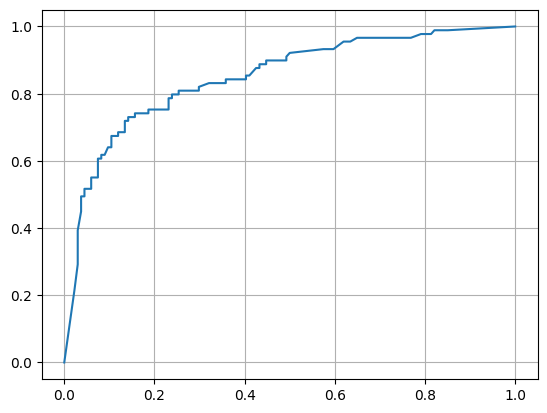

 AUC score: 0.8495304376991447


In [152]:
# ROC 곡선을 그려보자
# ROC(Receiver Operating Characteristic Curve)
# 암환자 관련 
# TP: 암환자 라고했는데 맞음 / FP : 암환자 라고했는데 틀림(정상)
# FN: 암환자 아니라고했는데 틀림 (암환자) / TN : 암환자 아니라고 했는데 맞음

# FP(실제 정상인을 암환자라고 잘못 판단한 것)
# TP(실제 암환자를 잘 판단) : 재현율 (Recall)
# FP : x , TP : y  축으로 두고 
# y = f(X) 그래프 -> ROC (둘의 관계를 그래프로 그리면 ROC 가 됨)

# 마지막 랜덤 포레스트 데이터로 F1 Score 출력
from sklearn.metrics import f1_score ,precision_score, recall_score,confusion_matrix

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


print(f"recall :{recall}")  # 62/89
print(f"precision :{precision}")  # 62/80
print(f"f1 score:{f1}") 

print("오차 행렬")
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

# [TN   FP
#  FN   TP]

# 116: 사망이라고판단했는데 맞음  / 62: 생존이라고 판단했는데 맞은것
# 27: 사망이라고 판단했는데 틀림 / 18: 생존이라고 판단했는데 틀린것

# 정밀도와 재현율이 반비례하는 경향이 있음.
# recall = tp/tp+fn  prec = tp/tp+fp  
# F둘다 줄어들면 정밀도 재현율 둘다 올라감

from sklearn.metrics import roc_curve

# FP(실제 정상인을 암환자라고 잘못 판단한 것)
# TP(실제 암환자를 잘 판단) : 재현율 (Recall)
# FP : x , TP : y  축으로 두고 
# y = f(X) 그래프 -> ROC (둘의 관계를 그래프로 그리면 ROC 가 됨)

# 잘못에 대한 비율
# FPR(ratio): 정상인을 암환자라고 잘못 판단하지는 않았는가 ? 낮으면 좋음
# TPR(ratio) : 암 환자를 잘 판단했는가 ? 높으면 좋음.

y_proba = r_forest.predict_proba(X_test)[:,1]
fpr,tpr,thresholds =roc_curve(y_test, y_proba) # 민감도(thresholds)에 따른 두 개의 비율
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.grid(True)
plt.show()

# ROC 곡선의 아래 영역의 넓이 : 이 모델이 얼마나 좋은가를 평가하는 척도로 커브의 아래 영역의 넓이를 계산
# AUC (Area Under the Curve) : AUC 가 1에 가까울 수록 좋은 성능의 모델.(최대 넓이가 1)
# 실제로 0.8 이상만 되면 훌륭한 모델 (EXcellent)/ 0.7이상이면 좋은 모델 (Good)
# 최악의 경우 y=x의 직선형태로 나타남 > AUC가 0.5 -> Trash 모델임(동전을 던져서 예측한 것과 동일함)

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_proba)
print(f" AUC score: {auc}") 

In [153]:
# 타이타닉 train.csv 를 불러와서 전처리 - 모델학습 - score 확인을 했음

# 이를 한번에 하는 pipeline 기능
# 전처리 ~ 모델학습 ~ score 확인 까지
# 전과정을 하나의 파이프에 연결하여
# 코드의 가독성 향상, 유지보수에 용이, 재사용성 높음


In [188]:
from sklearn.pipeline import Pipeline

import pandas as pd

df = pd.read_csv("train.csv")
# 필요 없는 column 삭제 후 X, y 대입
X = df.drop(["Survived",  "Name", "Ticket", "Cabin", "PassengerId"], axis=1)
y = df["Survived"]

# 전처리 프로세스
# 수치형 데이터 : (Pclass,) Age, SibSp, Fare, Parch
# 범주형 데이터 : Sex, Embarked,Pclass
# Pclass만 봤을때 1,2,3을 갖고 있는데, 3이 1보다 더 중요한 데이터를 담고 있는 것이 아니므로 범주형 데이터로 취급할 것
# 구간자체가 그 의미를 두지 않음
# but, SibSp 나 Parch 같은 경우엔 '함께 탑승한 가족(자매,부모/자식)의 수' 이므로 수치형 데이터임.

numeric_list = ["Age", "SibSp", "Parch", "Fare"]
categories_list = ["Sex", "Embarked", "Pclass"]

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 

# 만약 결측치가 존재한다면 평균으로 채움
pipe_mean_scaled = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# 범주형 데이터 중 결측치가 있으면 최빈값을 채우고, One-Hot 인코딩 진행
from sklearn.preprocessing import OneHotEncoder

pipe_freq_one_hot = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")) # 원-핫 인코딩 적용
])

# 우리가 만든 2개의 파이프를 원하는 컬럼에 적용하기
from sklearn.compose import ColumnTransformer

col_transf = ColumnTransformer(transformers=[
    ("num", pipe_mean_scaled, numeric_list),
    ("cat", pipe_freq_one_hot, categories_list)
])

# 최종 연결(결합)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
result_pipeline = Pipeline(steps=[
    ("preprocessor",col_transf),
    # ("classifier",KNeighborsClassifier(n_neighbors=3) # KNN쓰겠다
    # ("classifier",DecisionTreeClassifier(max_depth=3,random_state = 42) # D_T 쓰겠다
    # ("classifier",SVC(kernel="rbf",C=1.0, random_state = 42) # SVC쓰겠다
    ("classifier", RandomForestClassifier(
        random_state=42,
        max_depth=10,
        n_estimators=200,
        min_samples_leaf=5
    ))
])

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
result_pipeline.fit(X_train,y_train)


print(f"0.75 train 학습 데이터 점수 : {result_pipeline.score(X_train, y_train)}")
print(f"0.25 train 학습 데이터 점수 : {result_pipeline.score(X_test, y_test)}")

0.75 train 학습 데이터 점수 : 0.8607784431137725
0.25 train 학습 데이터 점수 : 0.8161434977578476
